# Exploratory Data Analysis (EDA)


In this section, we will conduct exploratory data analysis (EDA) to understand the trends and volatility of the assets over time.
We will cover:
1. Trend Visualization: Plotting closing prices over time for each asset.
2. Daily Percentage Change: Calculating and visualizing daily percentage changes to assess volatility.
3. Rolling Analysis: Using rolling means and standard deviations to capture short-term trends and fluctuations.
4. Outlier Detection: Identifying days with unusually high or low returns.

The datasets should include historical closing prices for Tesla (TSLA), Vanguard Total Bond Market ETF (BND), and S&P 500 ETF (SPY).


In [4]:

import yfinance as yf
import matplotlib.pyplot as plt

# Fetching historical data for each asset
tickers = ["TSLA", "SPY", "BND"]
start_date = "2015-01-01"
end_date = "2024-10-31"

# Downloading the data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Display the first few rows
data.head()


[*********************100%***********************]  3 of 3 completed


Ticker,BND,SPY,TSLA
Date,,,
2015-01-02 00:00:00+00:00,63.358780,173.173737,14.620667
2015-01-05 00:00:00+00:00,63.542740,170.046371,14.006000
2015-01-06 00:00:00+00:00,63.726723,168.444580,14.085333
2015-01-07 00:00:00+00:00,63.765076,170.543640,14.063333
2015-01-08 00:00:00+00:00,63.665401,173.570007,14.041333


### Trend Visualization

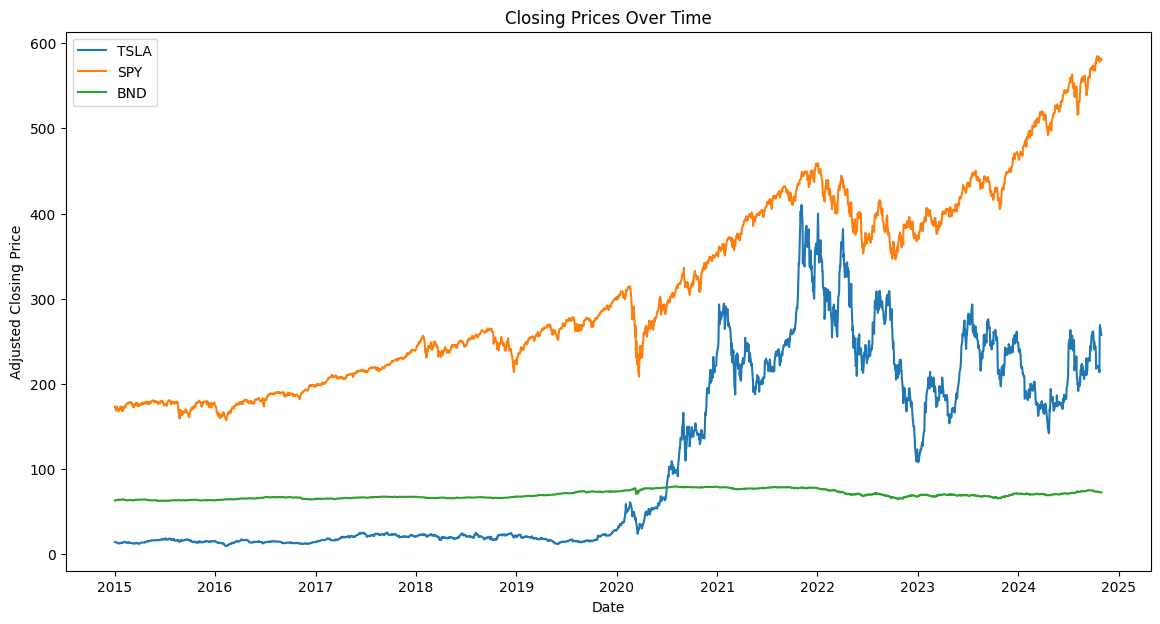

In [5]:

# Plotting closing prices over time for each asset
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)
    
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()


### Daily Percentage Change

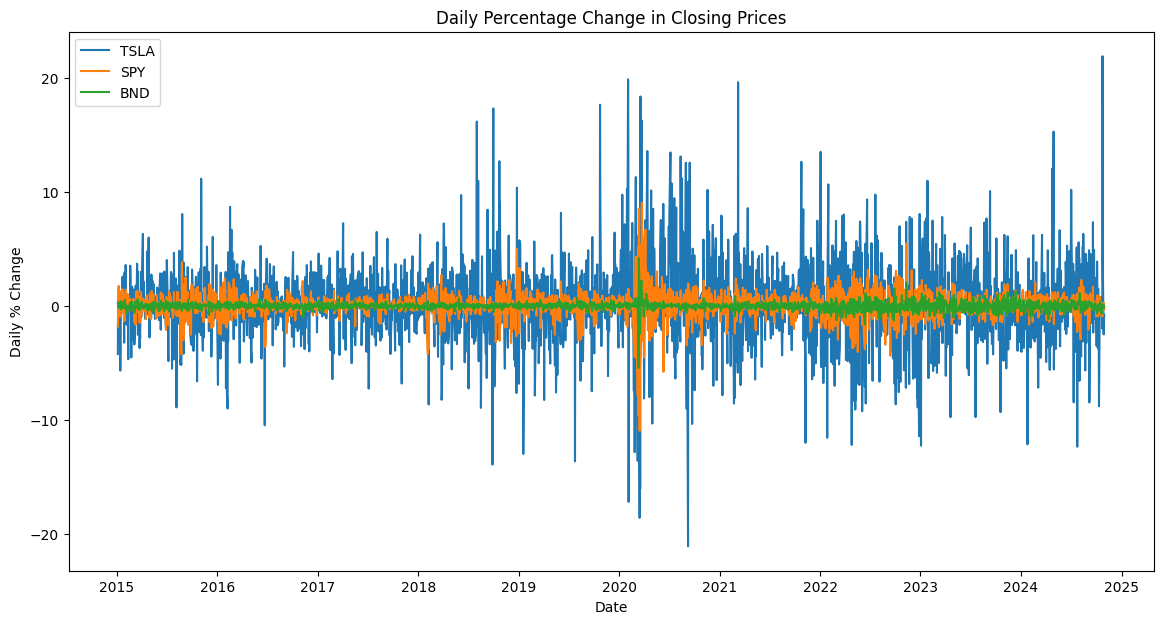

Ticker,BND,SPY,TSLA
count,2473.000000,2473.000000,2473.000000
mean,0.006224,0.055113,0.179905
std,0.342932,1.113370,3.580220
min,-5.438488,-10.942381,-21.062824
25%,-0.151078,-0.370876,-1.616758
50%,0.012400,0.059610,0.125870
75%,0.172324,0.593270,1.895455
max,4.220117,9.060305,21.919035


In [6]:

# Calculate daily percentage change
daily_pct_change = data.pct_change() * 100  # Convert to percentage

# Plot daily percentage change to visualize volatility
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(daily_pct_change[ticker], label=ticker)
    
plt.title('Daily Percentage Change in Closing Prices')
plt.xlabel('Date')
plt.ylabel('Daily % Change')
plt.legend()
plt.show()

# Display summary statistics for daily percentage change
daily_pct_change.describe()


### Rolling Analysis

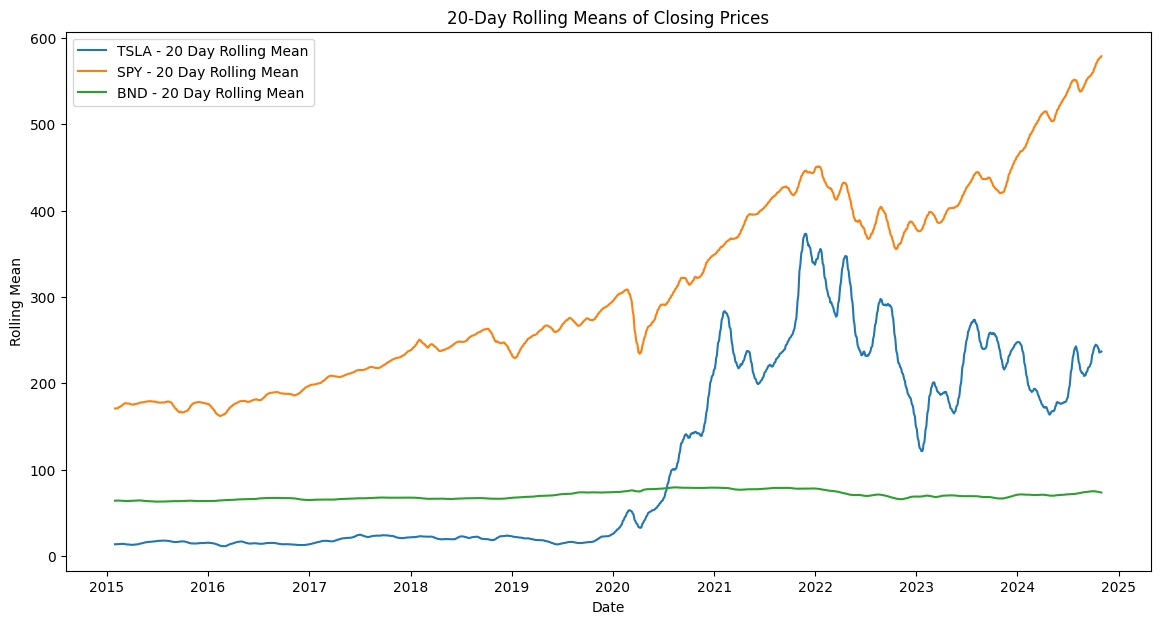

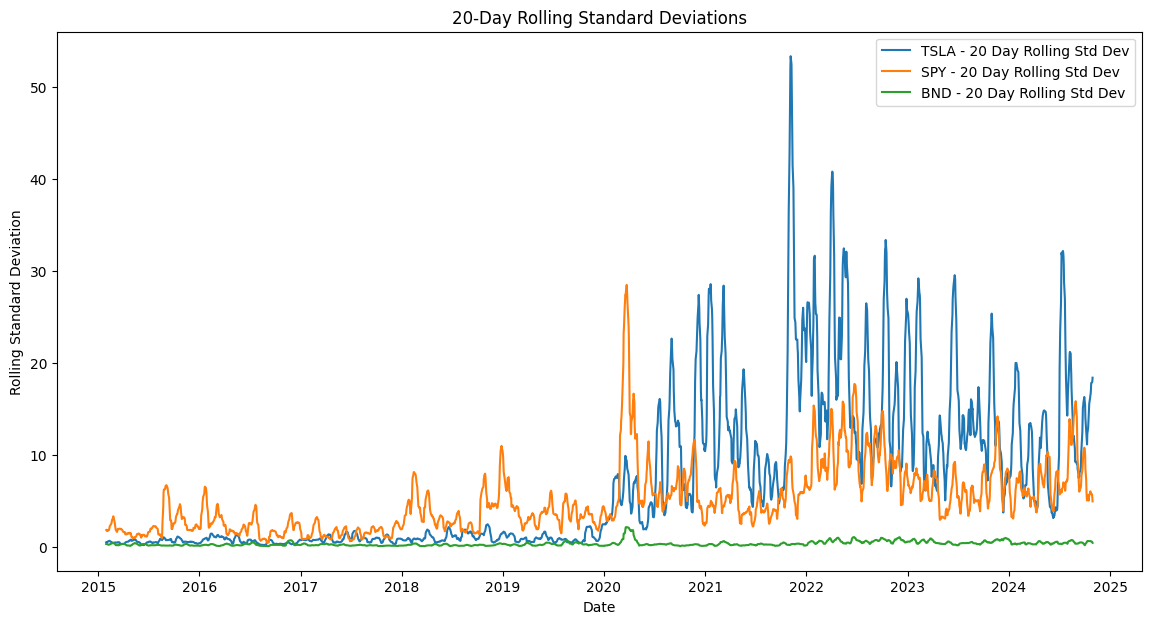

In [7]:

# Define rolling window size
window_size = 20  # Example: 20-day rolling

# Calculate rolling means and standard deviations
rolling_means = data.rolling(window=window_size).mean()
rolling_stddevs = data.rolling(window=window_size).std()

# Plot rolling means
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(rolling_means[ticker], label=f"{ticker} - {window_size} Day Rolling Mean")

plt.title(f'{window_size}-Day Rolling Means of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Rolling Mean')
plt.legend()
plt.show()

# Plot rolling standard deviations
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(rolling_stddevs[ticker], label=f"{ticker} - {window_size} Day Rolling Std Dev")

plt.title(f'{window_size}-Day Rolling Standard Deviations')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.legend()
plt.show()


### Outlier Detection

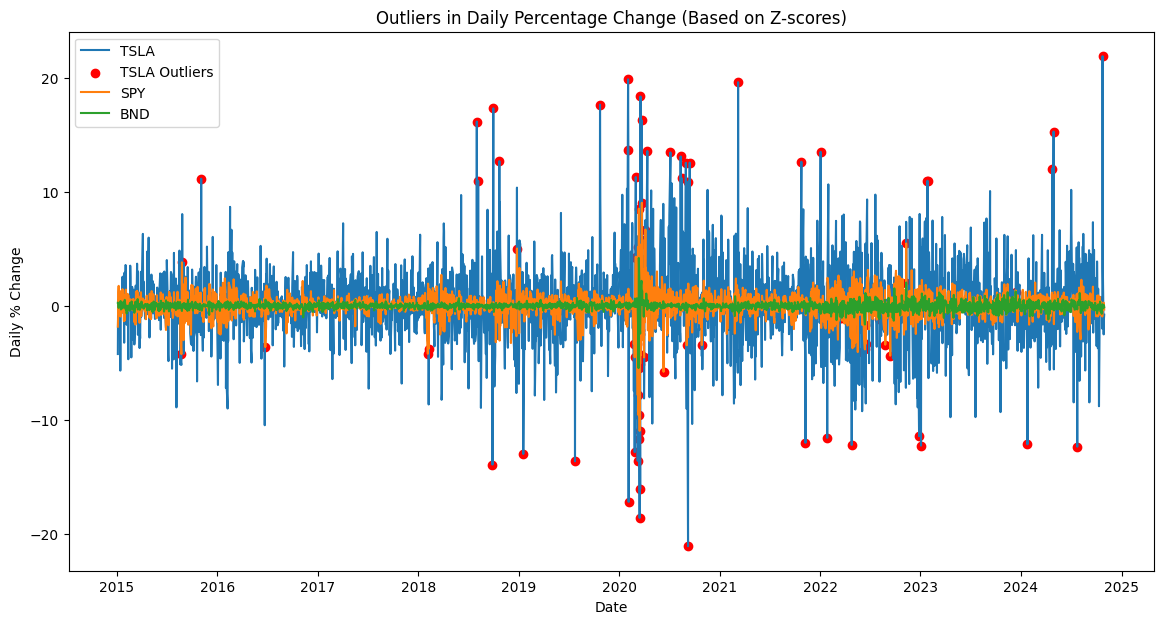

In [8]:

# Identify outliers based on daily percentage change
outlier_threshold = 3  # Example threshold (3 standard deviations)

# Calculate Z-scores for each percentage change value
z_scores = (daily_pct_change - daily_pct_change.mean()) / daily_pct_change.std()
outliers = (z_scores.abs() > outlier_threshold)

# Plotting the outliers
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(daily_pct_change[ticker], label=ticker)
    plt.scatter(daily_pct_change.index[outliers[ticker]], daily_pct_change[ticker][outliers[ticker]], 
                color='red', label=f'{ticker} Outliers' if ticker == tickers[0] else "")

plt.title('Outliers in Daily Percentage Change (Based on Z-scores)')
plt.xlabel('Date')
plt.ylabel('Daily % Change')
plt.legend()
plt.show()



In this notebook, we have:
- Visualized the trend in closing prices over time for each asset.
- Calculated and visualized daily percentage changes to assess volatility.
- Conducted rolling analysis with moving averages and standard deviations to capture short-term trends.
- Detected outliers in daily returns based on Z-scores.

This completes the exploratory data analysis section.
